

```
# (d) (20 points) Architecture evaluation
• Pick the best optimizer and it’s hyper-parameters from the previous part.
• Using sub training and validation datasets, find the best architecture in terms
of the number of layers, the number of units, and activation functions.
• Report 3 best architectures in terms of test accuracy. Please include architecture diagram as shown in Figure 1.

```



In [1]:
#from mnist import MNIST
import os
#import numpy as np

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


(X_train, y_train), (X_test, y_test) = mnist.load_data()

#mndata = MNIST('mnist')

#X_train, y_train = mndata.load_training()
#X_test, y_test = mndata.load_testing()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

np.shape(X_test)

(10000, 784)

In [3]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

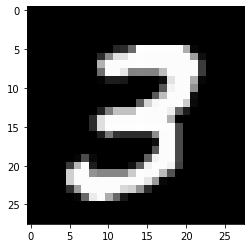

3


In [4]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(X_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])



```
# The best Optimizer obtained from the previous step is Adam's optimizer..
```



Achitecture 1

In [15]:
model_adam1 = Sequential()
model_adam1.add(Dense(512, Activation('relu'), input_shape=(784,)))
model_adam1.add(Dropout(0.45))
model_adam1.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_adam1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model_adam1.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


394/394 [==============================] - 5s 12ms/step - loss: 0.3505 - accuracy: 0.8969 - val_loss: 0.1587 - val_accuracy: 0.9565
Epoch 2/10
394/394 [==============================] - 4s 11ms/step - loss: 0.1635 - accuracy: 0.9523 - val_loss: 0.1129 - val_accuracy: 0.9691
Epoch 3/10
394/394 [==============================] - 4s 11ms/step - loss: 0.1206 - accuracy: 0.9638 - val_loss: 0.0909 - val_accuracy: 0.9758
Epoch 4/10
394/394 [==============================] - 5s 12ms/step - loss: 0.0967 - accuracy: 0.9710 - val_loss: 0.0805 - val_accuracy: 0.9755
Epoch 5/10
394/394 [==============================] - 4s 11ms/step - loss: 0.0819 - accuracy: 0.9746 - val_loss: 0.0758 - val_accuracy: 0.9777
Epoch 6/10
394/394 [==============================] - 4s 11ms/step - loss: 0.0692 - accuracy: 0.9792 - val_loss: 0.0738 - val_accuracy: 0.9787
Epoch 7/10
394/394 [==============================] - 4s 11ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0683 - val_accuracy: 0.9798
Epoch 8/10

In [16]:
# Accuracy obtained from Architecture 1

score = model_adam1.evaluate(X_test, Y_test)
print('Test accuracy Adam Optimizer - Architecture 1:', score[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0603 - accuracy: 0.9812
Test accuracy Adam Optimizer - Architecture 1: 98.11999797821045


Architecture 2

In [23]:
model_adam2 = Sequential()
model_adam2.add(Dense(256, Activation('relu'), input_shape=(784,)))
model_adam2.add(Dropout(0.45))
model_adam2.add(Dense(512, Activation('tanh')))
model_adam2.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_adam2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model_adam2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


394/394 [==============================] - 5s 12ms/step - loss: 0.3472 - accuracy: 0.8943 - val_loss: 0.1411 - val_accuracy: 0.9605
Epoch 2/10
394/394 [==============================] - 4s 11ms/step - loss: 0.1721 - accuracy: 0.9470 - val_loss: 0.0988 - val_accuracy: 0.9719
Epoch 3/10
394/394 [==============================] - 4s 11ms/step - loss: 0.1325 - accuracy: 0.9580 - val_loss: 0.0919 - val_accuracy: 0.9722
Epoch 4/10
394/394 [==============================] - 4s 11ms/step - loss: 0.1138 - accuracy: 0.9640 - val_loss: 0.0932 - val_accuracy: 0.9740
Epoch 5/10
394/394 [==============================] - 4s 11ms/step - loss: 0.0981 - accuracy: 0.9685 - val_loss: 0.0902 - val_accuracy: 0.9746
Epoch 6/10
394/394 [==============================] - 4s 11ms/step - loss: 0.0881 - accuracy: 0.9725 - val_loss: 0.0874 - val_accuracy: 0.9740
Epoch 7/10
394/394 [==============================] - 5s 12ms/step - loss: 0.0807 - accuracy: 0.9739 - val_loss: 0.0823 - val_accuracy: 0.9775
Epoch 8/10

In [24]:
# Accuracy obtained from Architecture 2

score = model_adam2.evaluate(X_test, Y_test)
print('Test accuracy Adam Optimizer - Architecture 2:', score[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0781 - accuracy: 0.9780
Test accuracy Adam Optimizer - Architecture 2: 97.79999852180481


Architecture 3

In [22]:
model_adam3 = Sequential()
model_adam3.add(Dense(256, Activation('relu'), input_shape=(784,)))
model_adam3.add(Dropout(0.2))
model_adam3.add(Dense(512, Activation('tanh')))
model_adam3.add(Dense(512, Activation('sigmoid')))
model_adam3.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_adam3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model_adam3.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.16, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


394/394 [==============================] - 8s 19ms/step - loss: 0.3102 - accuracy: 0.9053 - val_loss: 0.1139 - val_accuracy: 0.9651
Epoch 2/10
394/394 [==============================] - 7s 18ms/step - loss: 0.1212 - accuracy: 0.9629 - val_loss: 0.0917 - val_accuracy: 0.9729
Epoch 3/10
394/394 [==============================] - 9s 23ms/step - loss: 0.0872 - accuracy: 0.9726 - val_loss: 0.0858 - val_accuracy: 0.9760
Epoch 4/10
394/394 [==============================] - 7s 18ms/step - loss: 0.0716 - accuracy: 0.9774 - val_loss: 0.0831 - val_accuracy: 0.9768
Epoch 5/10
394/394 [==============================] - 7s 18ms/step - loss: 0.0573 - accuracy: 0.9816 - val_loss: 0.0833 - val_accuracy: 0.9765
Epoch 6/10
394/394 [==============================] - 7s 18ms/step - loss: 0.0557 - accuracy: 0.9820 - val_loss: 0.0904 - val_accuracy: 0.9750
Epoch 7/10
394/394 [==============================] - 7s 18ms/step - loss: 0.0458 - accuracy: 0.9844 - val_loss: 0.0877 - val_accuracy: 0.9774
Epoch 8/10

In [25]:
# Accuracy obtained from Architecture 3

score = model_adam3.evaluate(X_test, Y_test)
print('Test accuracy Adam Optimizer - Architecture 3:', score[1]*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.0743 - accuracy: 0.9806
Test accuracy Adam Optimizer - Architecture 3: 98.05999994277954
